# 图像增广

In [1]:
%matplotlib inline

import torch
import torchvision

from torch import nn
import d2l_torch as d2l

## 读取基本图像

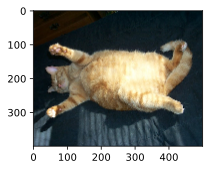

In [3]:
d2l.set_figsize()
img=d2l.Image.open("../pytorch/img/cat1.jpg")
d2l.plt.imshow(img)

## 辅助显示画图函数

In [4]:
def apply(img,aug,num_rows=2,num_cols=4,scale=1.5):
    Y=[aug(img) for _ in range(num_rows*num_cols)]
    d2l.show_images(Y,num_rows,num_cols,scale=scale)

这里的这个`_`没有实际意义，只是单纯去进行一个循环，让`aug(img)`循环执行`num_rows*num_cols`次

In [6]:
2*[1,2,3]

[1, 2, 3, 1, 2, 3]

In [7]:
def times(alist):
    return 2*alist
print([times([1,2]) for _ in range(2)])

[[1, 2, 1, 2], [1, 2, 1, 2]]


以下是`show_images`的函数原型：
```python
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # Tensor Image
            ax.imshow(img.numpy())
        else:
            # PIL Image
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

```

## 左右翻转图像

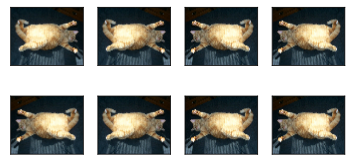

In [14]:
apply(img,torchvision.transforms.RandomHorizontalFlip(p=0.5))

关于`torchvision.transforms.RandomHorizontalFlip()`这个函数，可以参考：
+ [PyTorch 学习笔记（三）：transforms的二十二个方法](https://zhuanlan.zhihu.com/p/53367135)
    + 这个人写了一本书，书的配套代码位于：<https://github.com/TingsongYu/PyTorch_Tutorial>
+ pytorch官方文档：<https://pytorch.org/vision/main/generated/torchvision.transforms.RandomHorizontalFlip.html>

---
输入的可以是PIL的Image或者是Tensor
+ 默认p=0.5，也就是每次调用，有一半的概率翻转，有一半不翻转
+ 因此可以看到，原图是猫头在左，
+ 如果不指定p=0.5，那么结果大约有6个是猫头在右边。（反正我每次调用，猫头位于某个方向的是2，另一个方向是6，总是2:6，没有1:1）
+ 但是如果显示的写上p=0.5，那么就是猫头朝左或者朝右就都是4:4，或者3:5

**这个p=0.5并不能完全保证，调用8次，其中一半是不翻转，一半是翻转，怪不得有人天干玄黄选随机数种子。。。真的是玄学**

## **调用形式**

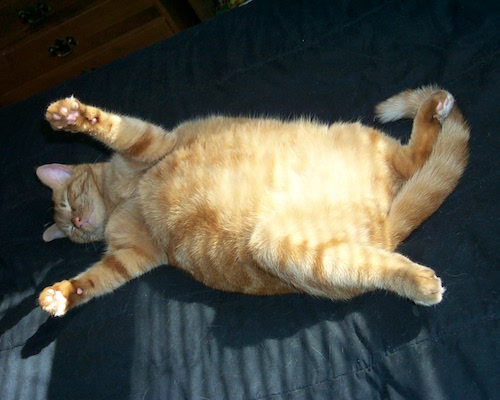

In [17]:
torchvision.transforms.RandomVerticalFlip()(img)

或者还可以

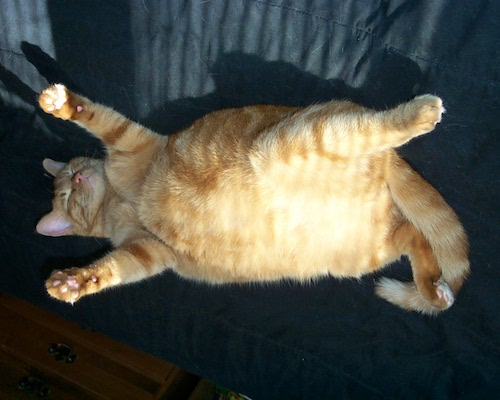

In [18]:
aug=torchvision.transforms.RandomVerticalFlip()
aug(img)

+ 可以去看看[源代码](https://pytorch.org/vision/main/_modules/torchvision/transforms/transforms.html#RandomHorizontalFlip)，其实这些变换函数里，都实现了一个`forward`函数，
+ 另外，在`compose`函数中，还有以下代码：
    ```python
    def __call__(self, img):
        for t in self.transforms:
            img = t(img)
        return img
```
+ 在函数`RandomHorizontalFlip`中，有以下内容：
    ```python
 def forward(self, img):
```
+ 所以在调用类的时候，类后面加一个括号，其实就是在调用forward函数了

## 上下翻转图像

类似的，除了左右翻转，还有上下翻转

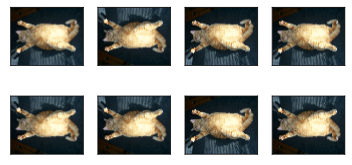

In [15]:
apply(img,torchvision.transforms.RandomVerticalFlip())

这里看猫腿，比较直接。
+ 原图猫明显的那个腿在下面，
+ 所以使用这个变换之后，可以看到，有4个没变，4个变了。也是50%概率

## 随机裁剪

In [20]:
img.size

(500, 400)

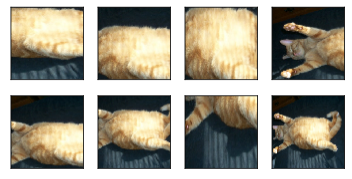

In [22]:
shape_aug=torchvision.transforms.RandomResizedCrop(size=(200,200),scale=(0.1,1),ratio=(1/2,2/1))

apply(img,shape_aug)

**函数参数解释**：
+ `size`：输出的裁剪块的大小，(h,w)，如果只有一个值，默认(size,size)
+ `scale`：随机裁剪区域的上界和下界。scale是对应于没有进行resize之前的原图而言的（裁剪的区域占原图面积的百分比，然后再resize成要求的size即可）
+ `ratio`：被裁减区域在resize之前的长宽比范围（上界和下界），aspect ratio 长宽比
+ `interpolation`：采用的插值模式，默认是2 InterpolationMode.BILINEAR 线性插值

## 随机修改图像亮度/颜色/饱和度

**改变亮度**

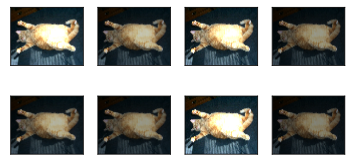

In [26]:
apply(img,torchvision.transforms.ColorJitter(brightness=0.5,contrast=0,saturation=0,hue=0))

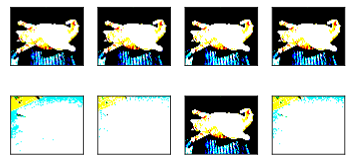

In [25]:
apply(img,torchvision.transforms.ColorJitter(brightness=100,contrast=100,saturation=0,hue=0))

+ 色彩抖动（Color jitter），抖动(Jitter)
+ brightness：亮度，浮点数或者浮点数元组(min,max)，亮度上改变多少。
    + **亮度因子均匀的从[max(0, 1 - brightness), 1 + brightness]（给1个值）或者给出的[min, max]（给两个值）中选择**，应该是一个非负的数值。
+ contrast：对比度，浮点数或者浮点数元组(min,max)，对比度上改变多少。
    + 对比度因子均匀的从[max(0, 1 - contrast), 1 + contrast]（给1个值）或者给出的[min, max]（给两个值）中选择，应该是一个非负的数值。
+ saturation：饱和度，浮点数或者浮点数元组(min,max)，饱和度上改变多少。
    + 对比度因子均匀的从 [max(0, 1 - saturation), 1 + saturation]（给1个值）或者给出的[min, max]（给两个值）中选择，应该是一个非负的数值。
+ hue：色相，浮点数或者浮点数元组(min,max)，色相上抖动多少
    + 色相因子均匀的从 [-hue, hue]（给1个值）或者给出的[min, max]（给两个值）中选择，0<= hue <= 0.5 或者 -0.5 <= min <= max <= 0.5.

----
+ 前三种因子，取值只要是非负就可以，不是0-2之间！可以试试brightness取100（过度曝光。。。），取0.5都看看
+ 另外，这个**Colorjitter不是以概率来做变化的，而是在亮度等变化范围内，每次随机选择范围内的某个值进行变化**，
+ 所以如果使用这种增强方式，**每次生成的内容不会有概率保持原图，而是一定会有改变，只是改变的程度会有所不同**


**改变色相**

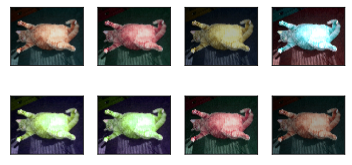

In [27]:
apply(img,torchvision.transforms.ColorJitter(brightness=0.5,contrast=0,saturation=0,hue=0.5))

**更常见的是，饱和度，亮度，对比度，色相都发生改变**

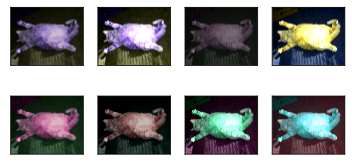

In [29]:
color_aug=torchvision.transforms.ColorJitter(brightness=0.5,contrast=0.5,saturation=0.5,hue=0.5)
apply(img,color_aug)

## 组合多种图像增强方法

一般不会只使用一种图像增强方式，而是多种结合起来使用

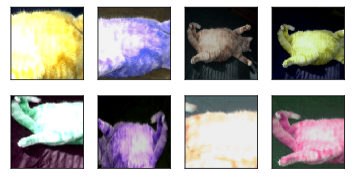

In [30]:
augs=torchvision.transforms.Compose([torchvision.transforms.RandomHorizontalFlip(),
                                    shape_aug,
                                    color_aug
                                    ])
apply(img,augs)

这里不同的增强方法作为列表参数传入，可以看一下`Compose`的源码，点击[这里](https://pytorch.org/vision/main/_modules/torchvision/transforms/transforms.html#Compose)，关键代码如下：
```python
def __call__(self, img):
        for t in self.transforms:
            img = t(img)
        return img
```

实际上就是，**对一张图依次使用图像增强方法列表中每一种增强方式**，得到最后的结果
+ 对上面的例子来说，就是先对原图做裁剪，裁剪的结果再去做水平翻转，在翻转的基础上再去改变颜色。
+ 对原图做了8次这样的增强，得到8张增强后的结果

# 使用图像增广进行训练

## CIFAR10数据集介绍

参考：[PaperWithCode-CIFAR-10](https://paperswithcode.com/dataset/cifar-10)

CIFAR-10数据集（加拿大高级研究所，10个类）是Images dataset的一个子数据集，由6w张32x32的彩色图构成。（简单来说，就是从ImageNet数据集里抽取了10类，又把图像变小形成的）
+ 这些图像被标记为不同的类，包括 airplane飞机, automobile小汽车，但不是皮卡或者卡车 (but not truck or pickup truck), bird鸟, cat猫, deer鹿, dog狗, frog青蛙, horse马, ship轮船, and truck卡车，但不是皮卡 (but not pickup truck)
+ 每个类有5k张训练集和1k张测试集

## 使用torch.datasets获取CIFAR-10数据集

下载数据集，执行一次就可以了，有的话，即便执行download是true，也不会再下载的

In [32]:
all_images=torchvision.datasets.CIFAR10(root="../data",train=True,download=True) 
#这步只下载训练集，其实上面这个函数里有 transform这个参数，在下载的时候就可以直接进行图像增广

Using downloaded and verified file: ../data\cifar-10-python.tar.gz
Extracting ../data\cifar-10-python.tar.gz to ../data


+ 这个下载非常慢，整个压缩包有163MB。。。。直接用迅雷下载吧，这个太慢了。。。 链接：<http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz>
+ 下载完之后，直接放到指定的文件夹，再去执行上面的命令，就会直接解压了，解压完是177MB，还好，变化不大。

查看图像

In [35]:
type(all_images[1])

tuple

In [36]:
len(all_images[1])

2

In [38]:
all_images[1]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x253007BFE08>, 9)

所以这个数据的数据结构大概就是，每个图是一个元组，（图像，图像的标记序号）

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002537BA34D08>,
      dtype=object)

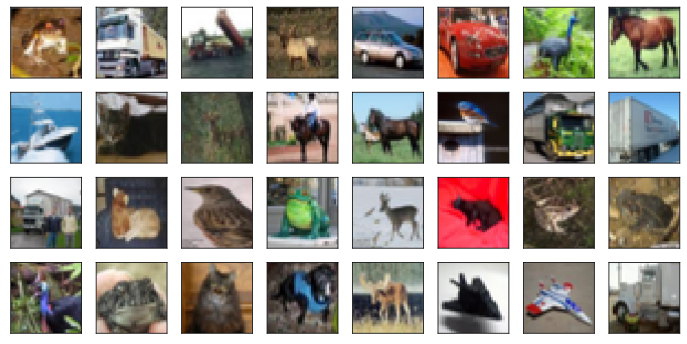

In [34]:
d2l.show_images([all_images[i][0] for i in range(32)],num_cols=8,num_rows=4)

图着实不是很清晰，第一个应该是青蛙。

## 定义数据增强方法

In [2]:
train_augs=torchvision.transforms.Compose([torchvision.transforms.RandomHorizontalFlip(),
                                       torchvision.transforms.ToTensor()])
test_augs=torchvision.transforms.ToTensor()  #只有一个增强方式，没必要再写一个Compose，如果考虑扩展性，确实可以那么写，但是这里没必要

这里训练的时候，其实只使用了一个数据增强，就是水平翻转。
+ 因为图像本身已经很小了，所以没必要resize。（所以可以不使用随机裁剪这种增强方式）
+ 另外，图后面跟一个`ToTensor`其实是为了把图像变成Tensor，这样可以直接训练。正常是一个图变成一个(C,H,W)的一个3d的张量
+ 但是在训练的时候，因为有个batch_size，所以训练时候，实际上这步之后就变成了一个4d的tensor，(b,c,h,w)

下面可以打印一下，看看维度变化是怎么样的。**TBD**

## 将数据增强应用到dataloader中

定义一个辅助函数，以便于读取图像和应用图像增广

In [3]:
def load_cifar10(is_train,augs,batch_size):
    dataset=torchvision.datasets.CIFAR10(root="../data",train=is_train,transform=augs,download=True)
    dataloader=torch.utils.data.DataLoader(dataset,batch_size=batch_size,shuffle=is_train,num_workers=4)
    return dataloader

+ 图像增广对于计算量要求其实挺高的，所以建议把`num_workers`都调节大一些。
+ 另外，这里图像增强后的结果其实都是直接放在内存里，不会有内存和硬盘的IO，所以对内存的要求也会比较高。。。

## 训练

定义一个函数，使用多GPU对模型进行训练和评估 （BTW，只有1个GPU，所以我就老老实实写1就好了）

In [4]:
def train_batch_ch13(net, X, y, loss, trainer, devices):
    """
    计算一个batch的损失和准确率
    """
    if isinstance(X, list):
        X = [x.to(devices[0]) for x in X]
    else:
        X = X.to(devices[0])
    y = y.to(devices[0])
    net.train()  # model.train() training mode 训练模式，model.eval() 推理模式
    trainer.zero_grad()
    pred = net(X)
    l = loss(pred, y)
    l.sum().backward()
    trainer.step()
    train_loss_sum = l.sum()
    train_acc_sum = d2l.accuracy(pred, y)
    return train_loss_sum, train_acc_sum


def train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs,
               devices=d2l.try_all_gpus()):
    """
    整体的训练，包括画图啊，时间啊，最后输出的东西
    """
    timer, num_batches = d2l.Timer(), len(train_iter)
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0, 1],
                            legend=['train loss', 'train acc', 'test acc'])
    net = nn.DataParallel(net, device_ids=devices).to(devices[0])
    for epoch in range(num_epochs):
        metric = d2l.Accumulator(4)
        for i, (features, labels) in enumerate(train_iter):
            timer.start()
            l, acc = train_batch_ch13(net, features, labels, loss, trainer,
                                      devices)
            metric.add(l, acc, labels.shape[0], labels.numel())
            timer.stop()
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(
                    epoch + (i + 1) / num_batches,
                    (metric[0] / metric[2], metric[1] / metric[3], None))
        test_acc = d2l.evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {metric[0] / metric[2]:.3f}, train acc '
          f'{metric[1] / metric[3]:.3f}, test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec on '
          f'{str(devices)}')

训练的准备工作

In [5]:
# 超参，网络，初始化
batch_size, devices, net = 256, d2l.try_all_gpus(), d2l.resnet18(10, 3)

def init_weights(m):
    if type(m) in [nn.Linear, nn.Conv2d]:
        nn.init.xavier_uniform_(m.weight)  # 其实默认也有初始化，但是似乎是kaiming初始化

net.apply(init_weights)

# 加载dataloader数据，确定损失函数，优化器
def train_with_data_aug(train_augs, test_augs, net, lr=0.001):
    train_iter = load_cifar10(True, train_augs, batch_size)
    test_iter = load_cifar10(False, test_augs, batch_size)
    loss = nn.CrossEntropyLoss(reduction="none")
    trainer = torch.optim.Adam(net.parameters(), lr=lr)  #Adam是平滑的SGD，对lr不敏感
    train_ch13(net, train_iter, test_iter, loss, trainer, 10, devices)

开始训练

loss 0.168, train acc 0.944, test acc 0.807
406.6 examples/sec on [device(type='cuda', index=0)]


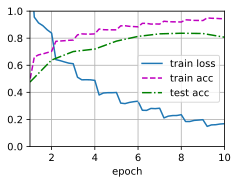

In [50]:
train_with_data_aug(train_augs, test_augs, net)

+ 有点过拟合，我的过拟合比沐神的还要严重。。
+ 不过这里其实没有完全收敛，50个epoch其实应该会好一些

看一下用增广和不用增广的区别，直接把测试的增广（其实就是把图像变成Tensor，没有进行其他操作）放到原先训练的增广上就可以

loss 0.063, train acc 0.979, test acc 0.824
406.0 examples/sec on [device(type='cuda', index=0)]


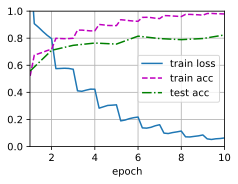

In [6]:
train_with_data_aug(test_augs, test_augs, net)

+ 过拟合更严重了。。
+ 说明数据增强其实是可以帮助减轻 训练集与测试集 分布的差异，减轻过拟合现象
+ 另外，也可以配合weight decay等手段来减轻过拟合